In [48]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.colors as mcolors
from scipy.stats import bootstrap
import random as rd
from file_helper import load_all_files
# sketchy way of figuring out if latex is installed, might fail.
# If it does, comment out
from distutils.spawn import find_executable
from itertools import cycle
import os
import pickle as pk
from statistic.generate_statistics import genSstat, get_ranking_results, reject_if_bad_test
from plotting import plot_stat, put_plot_rank

In [50]:
path_dir = 'results'
base =6
list_files = load_all_files(path_dir)
file_to_load = 'GEN_'+str(base**base)+'_10000_10_2_3_binning'
print(file_to_load)
print(list_files)

for file in list_files:
    file_name = file.split('.')[0]
    if file_to_load in file_name:
        print('found')
        with open(os.path.join(path_dir, file), 'rb') as f:  # load the data
                data = pk.load(f)
                data = data['data']

GEN_46656_10000_10_2_3_binning
['GEN_46656_10000_10_2_3_ranking.pk', 'GEN_46656_10000_10_2_3_hypothesis_algo.pk', 'GEN_46656_10000_10_2_3_S_algo.pk', 'GEN_46656_10000_10_2_3_binning_algo.pk']
found


In [51]:
list_of_title_q = list(data.keys())
print(list_of_title_q)
Bs = len(list(data[list_of_title_q[0]]))
Bs = [3,4,5,6]
m = 10000
test_epsilon = 0.15
delta = 0.05

store_results_algo = {}
store_results_random = {}
store_results_ranking = {'algo': [], 'random': []}
metrics = ['S', 'test', 'binning']
for metric in metrics:
    store_results_algo[metric] = {}
    store_results_random[metric] = {}
    for title in list_of_title_q:
        store_results_algo[metric][title] = []
        store_results_random[metric][title] = []

['argmaxAR', 'FCDM', 'CNF', 'CDM', 'ground truth']


In [52]:
for b in range(4):  # For each bin granularity
    for i, q_name in enumerate(list_of_title_q):
        print(q_name)
        list_binned_algo = data[q_name][b]
        print(list_binned_algo)
        test_algo = [reject_if_bad_test(
                    trial['p'], trial['q'], m, epsilon=test_epsilon, delta=delta) for trial in list_binned_algo]
        store_results_algo['test'][q_name].append(test_algo)
plot_data={'x': Bs, 'data': store_results_algo['test']}

argmaxAR
[{'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6662999999999998, 0.24660000000000012, 0.08710000000000007]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6557999999999996, 0.2588, 0.08540000000000036]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6651999999999998, 0.2455000000000002, 0.08930000000000005]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6683999999999998, 0.24559999999999998, 0.0860000000000003]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6707999999999996, 0.24400000000000022, 0.08520000000000016]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6604999999999999, 0.25030000000000013, 0.08919999999999995]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6609999999999998, 0.2512000000000003, 0.08779999999999988]}, {'p': [0.749999999999998, 0.24999999999999925, 0], 'q': [0.6662999999999993, 0.2503000000000002, 0.08340000000000047]}, {'p': [0.749999999999998, 0.24999999999

FCDM
[{'p': [0.3749999999999993, 0.12499999999999968, 0.3749999999999993, 0.12499999999999968, 0], 'q': [0.35600000000000015, 0.1505000000000001, 0.32460000000000017, 0.10820000000000005, 0.06069999999999953]}, {'p': [0.3749999999999993, 0.12499999999999968, 0.3749999999999993, 0.12499999999999968, 0], 'q': [0.3597, 0.14830000000000002, 0.32530000000000003, 0.10990000000000004, 0.05679999999999996]}, {'p': [0.3749999999999993, 0.12499999999999968, 0.3749999999999993, 0.12499999999999968, 0], 'q': [0.3595999999999999, 0.15050000000000013, 0.3210000000000003, 0.11320000000000006, 0.05569999999999964]}, {'p': [0.24999999999999972, 0.24999999999999925, 0.24999999999999972, 0.49999999999999883, 0], 'q': [0.25360000000000016, 0.26020000000000015, 0.22660000000000008, 0.42940000000000034, -0.16980000000000084]}, {'p': [0.3749999999999993, 0.12499999999999968, 0.3749999999999993, 0.12499999999999968, 0], 'q': [0.35620000000000007, 0.14800000000000013, 0.32310000000000016, 0.1126, 0.06009999999

FCDM
[{'p': [0.18749999999999994, 0.24999999999999925, 0.18749999999999994, 0.18749999999999994, 0.3749999999999993, 0], 'q': [0.17980000000000007, 0.2587000000000002, 0.17619999999999994, 0.17390000000000014, 0.32460000000000017, -0.11320000000000063]}, {'p': [0.3749999999999993, 0.08333333333333316, 0.3749999999999993, 0.08333333333333316, 0.1666666666666662, 0], 'q': [0.3597, 0.10220000000000001, 0.32530000000000003, 0.08390000000000003, 0.15600000000000017, -0.027100000000000346]}, {'p': [0.24999999999999972, 0.12499999999999968, 0.24999999999999972, 0.49999999999999883, 0.12499999999999968, 0], 'q': [0.24980000000000005, 0.15050000000000013, 0.22980000000000014, 0.43080000000000035, 0.11320000000000006, -0.1741000000000006]}, {'p': [0.18749999999999994, 0.24999999999999925, 0.18749999999999994, 0.18749999999999994, 0.3749999999999993, 0], 'q': [0.19390000000000007, 0.26020000000000015, 0.1715, 0.17020000000000007, 0.31760000000000027, -0.11340000000000061]}, {'p': [0.2499999999999

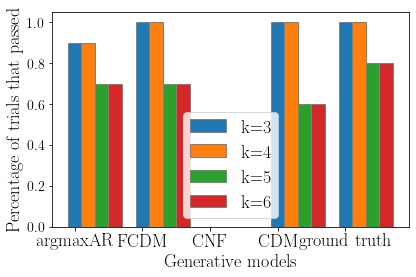

No handles with labels found to put in legend.


In [53]:
put_plot_rank(os.path.join('figures',file_name+'.pdf'), plot_data['x'], plot_data['data'])
plot_stat(os.path.join('figures',file_name+'.pdf'), 'Bins' , 'algo')
